<a href="https://colab.research.google.com/github/SunnyWangW/Colab/blob/main/KNN(Classfication_iris).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests

In [3]:
url = 'https://github.com/1010code/iris-dnn-tensorflow/raw/master/data/Iris.csv'
s=requests.get(url).content
df_data=pd.read_csv(io.StringIO(s.decode('utf-8')))
df_data = df_data.drop(labels=['Id'],axis=1) # 移除Id
df_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
label_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

#將編碼後的label map存至df_data['Species']中。
df_data['Class'] = df_data['Species'].map(label_map)

In [5]:
df_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Class
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [6]:
X = df_data.drop(labels=['Species','Class'],axis=1).values # 移除Species (因為字母不參與訓練)
# checked missing data
print("checked missing data(NAN mount):",len(np.where(np.isnan(X))[0]))

checked missing data(NAN mount): 0


In [7]:
from sklearn.model_selection import train_test_split
X=df_data.drop(labels=['Class','Species'],axis=1)
y=df_data['Class'].values
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=.3 , random_state=42)

print('Training data shape:',X_train.shape)
print('Testing data shape:',X_test.shape)

Training data shape: (105, 4)
Testing data shape: (45, 4)


建立 k-nearest neighbors(KNN) 模型
Parameters:

n_neighbors: 設定鄰居的數量(k)，選取最近的k個點，預設為5。
algorithm: 搜尋數演算法{'auto'，'ball_tree'，'kd_tree'，'brute'}，可選。
metric: 計算距離的方式，預設為歐幾里得距離。
Attributes:

classes_: 取得類別陣列。
effective_metric_: 取得計算距離的公式。
Methods:

fit: 放入X、y進行模型擬合。
predict: 預測並回傳預測類別。
score: 預測成功的比例。

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# 建立KNN模型
knnModel = KNeighborsClassifier(n_neighbors=3)
# 使用訓練資料訓練模型
knnModel.fit(X_train,y_train)
# 使用訓練資料預測分類
predicted= knnModel.predict(X_train)

In [9]:
# 預測成功的比例
print('訓練集: ',knnModel.score(X_train,y_train))
print('測試集: ',knnModel.score(X_test,y_test))

訓練集:  0.9428571428571428
測試集:  1.0


In [10]:
# 建立訓練集的 DataFrme
df_train=pd.DataFrame(X_train)
df_train['Class']=y_train
# 建立測試集的 DataFrme
df_test=pd.DataFrame(X_test)
df_test['Class']=y_test

In [12]:
df_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
81,5.5,2.4,3.7,1.0,1
133,6.3,2.8,5.1,1.5,2
137,6.4,3.1,5.5,1.8,2
75,6.6,3.0,4.4,1.4,1
109,7.2,3.6,6.1,2.5,2
...,...,...,...,...,...
71,6.1,2.8,4.0,1.3,1
106,4.9,2.5,4.5,1.7,2
14,5.8,4.0,1.2,0.2,0
92,5.8,2.6,4.0,1.2,1


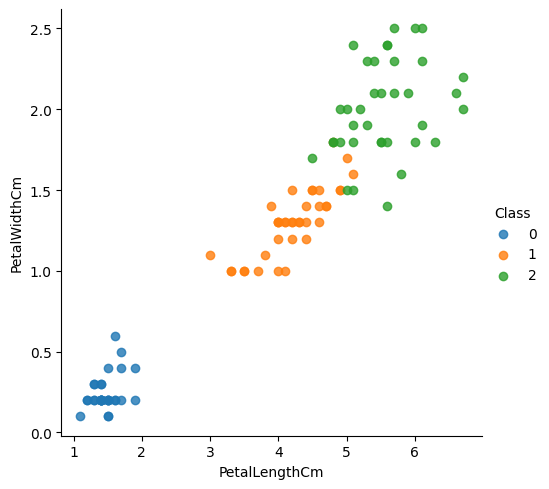

In [14]:
sns.lmplot(x ="PetalLengthCm", y = "PetalWidthCm", hue='Class', data=df_train, fit_reg=False)
# sns.lmplot(x = 'x-axis', y = 'y-axis', data = 'your-data')